## Group No 8

## Group Member Names:

1. Rekha N - 2022dc04058
2. Prabhakaran J - 2022dc04186
3. Sujitha J - 2022dc04059


# 1. Import the required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 2. Data Acquisition

In [2]:


# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, usecols=[1])  # Only load the 'Passengers' column
data = data.values  # Convert to a numpy array
data = data.astype('float32')  # Ensure data is in float32 format




# 3. Data Preparation

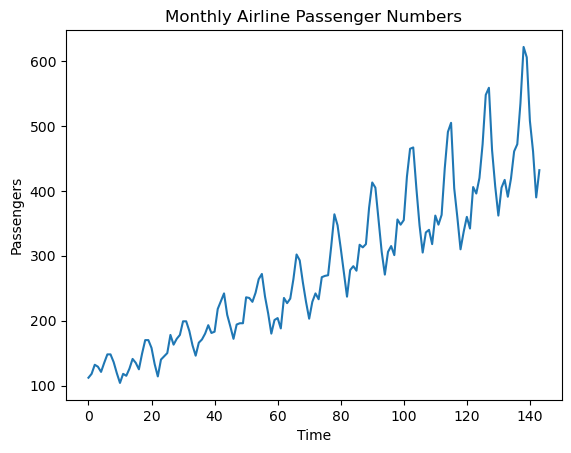

In [3]:
# Plot the dataset
plt.plot(data)
plt.title("Monthly Airline Passenger Numbers")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.show()



In [4]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for the RNN
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 12  # Using past 12 months to predict the next month
X, y = create_sequences(scaled_data, time_steps)



## 4. Deep Neural Network Architecture

## 4.1 Design the architecture that you will be using

 RNN 

In [5]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Reshape the data for the RNN (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


## 4.2 DNN Report

Report the following and provide justification for the same.

<p>*Number of Layers: 2</p>
<p>*Number of Units in Each Layer:</p>
    <p>LSTM Layer: 50</p>
    <p>Dense Layer: 1</p>
<p>*Total Number of Trainable Parameters: 451

# 5. Training the model

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))  # Single output for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 460ms/step - loss: 0.1282 - val_loss: 0.4123
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1024 - val_loss: 0.3637
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0839 - val_loss: 0.3142
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0755 - val_loss: 0.2620
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0591 - val_loss: 0.2056
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0394 - val_loss: 0.1469
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0267 - val_loss: 0.0888
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0183 - val_loss: 0.0425
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0174 - val_loss: 0.0253
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0161 - val_loss: 0.0292
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0119 - val_loss: 0.0393
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0102 - val_loss: 0.0445

# 6. Test the model

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred)

# 7. Report the result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


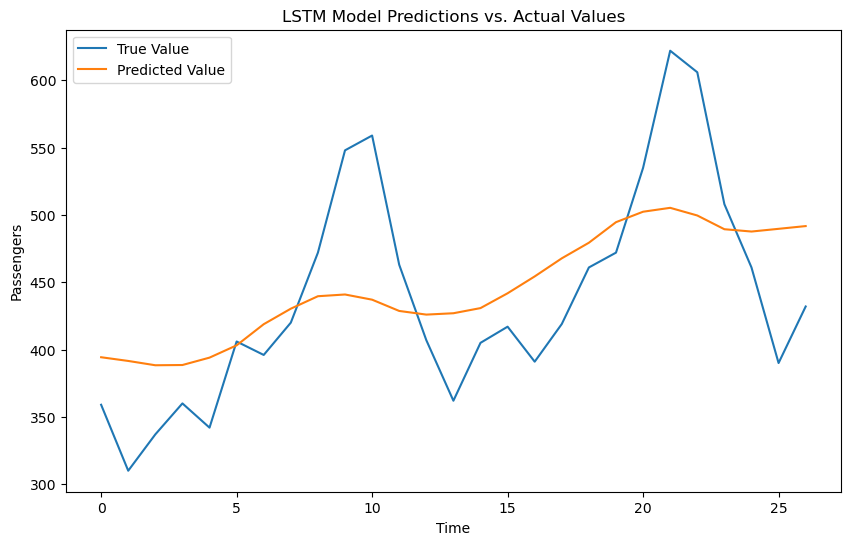

Mean Squared Error: 3589.832275390625
Root Mean Squared Error: 59.91521072387695
Mean Absolute Error: 49.208744049072266


In [7]:


# Plot the predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Predicted Value')
plt.title('LSTM Model Predictions vs. Actual Values')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
